In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("/content/sample_data/diabetes (1).csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [16]:
data["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


<ipython-input-3-dc0e7107bc5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])


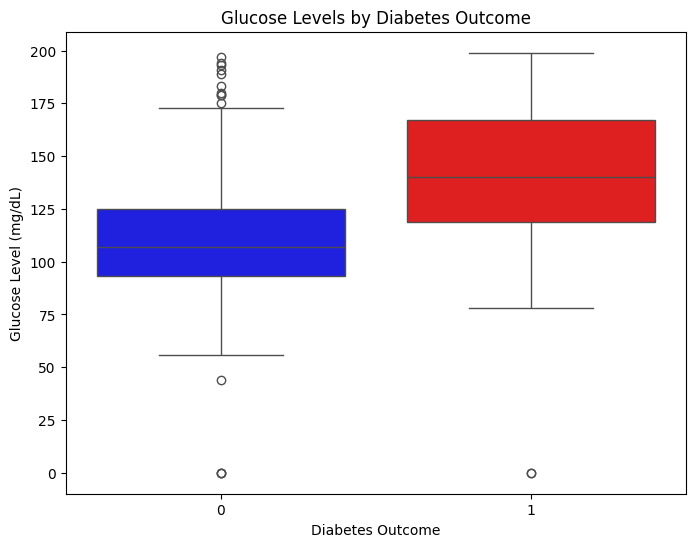

In [3]:
# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()


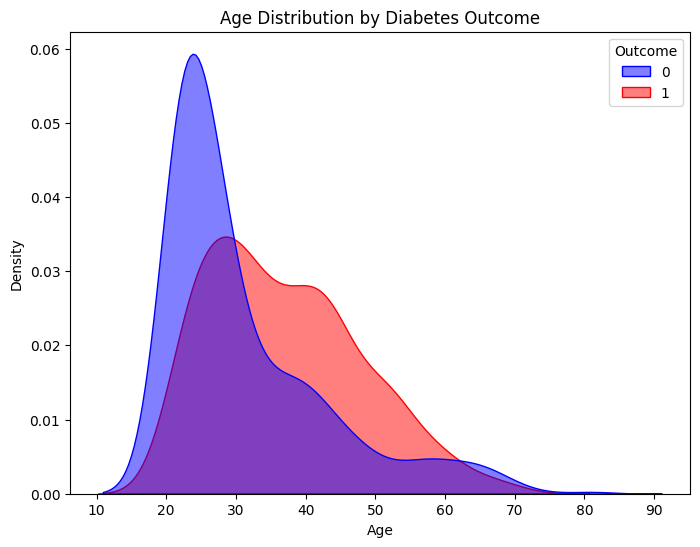

In [6]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


<ipython-input-8-4ebf377c5a9d>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-8-4ebf377c5a9d>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




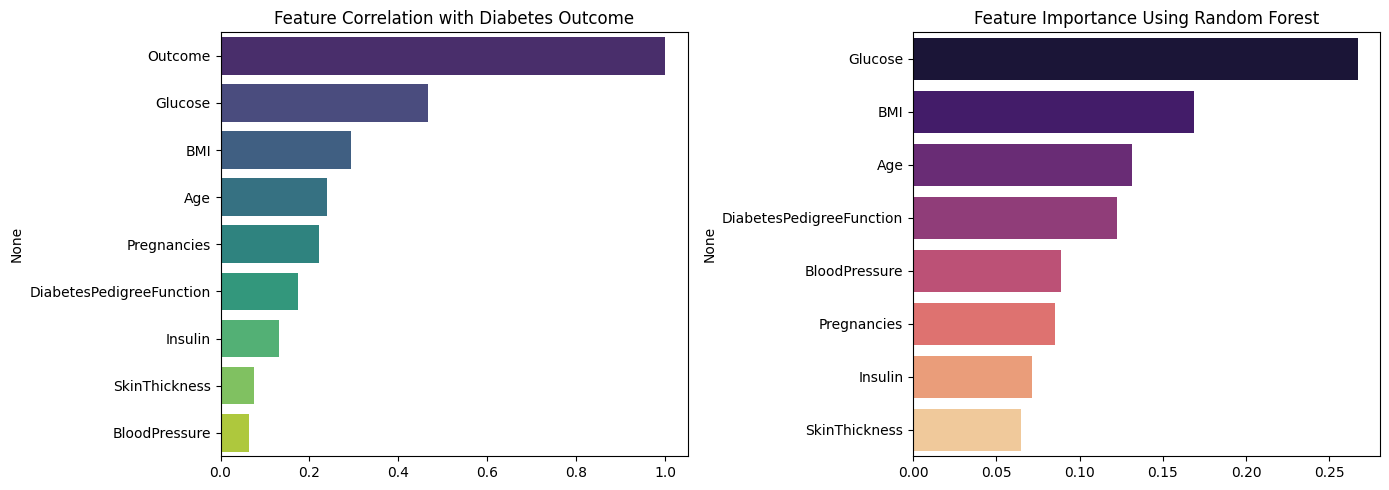

In [8]:
# Feature importance
corr = data.corr()["Outcome"].sort_values(ascending=False)
X = data.drop(columns=["Outcome"])
y = data["Outcome"]
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=corr.values, y=corr.index, ax=axes[0], palette="viridis")
axes[0].set_title("Feature Correlation with Diabetes Outcome")
sns.barplot(x=feature_importances.values, y=feature_importances.index, ax=axes[1], palette="magma")
axes[1].set_title("Feature Importance Using Random Forest")
plt.tight_layout()
plt.show()

In [9]:
# Interactive visualizations
fig1 = px.scatter(data, x="Glucose", y= "BMI", color="Outcome", title="Glucose vs BMI (Diabetes Outcome)", hover_data=["Age"])
fig1.show()
fig2 = px.scatter(data, x="Age", y="DiabetesPedigreeFunction", color="Outcome", title="Age vs Diabetes Pedigree Function (Diabetes Outcome)", hover_data=["Glucose", "BMI"])
fig2.show()

In [11]:
def estimate_risk(age, height_cm, weight_kg, glucose):
    bmi = weight_kg / (height_cm / 100) ** 2
    input_data = pd.DataFrame([[
        0,  # Pregnancies (default 0)
        glucose,
        80,  # BloodPressure (default normal value)
        20,  # SkinThickness (default average value)
        80,  # Insulin (default average value)
        bmi,
        0.5,  # DiabetesPedigreeFunction (default average value)
        age
    ]], columns=X.columns)

    prediction = model.predict(input_data)[0]
    return "High risk of diabetes" if prediction == 1 else "Low risk of diabetes"

print(estimate_risk(54, 178, 96, 125))

Low risk of diabetes


In [12]:
# Train a predictive model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

